# **Main Project**

# **About the Dataset**
The Secondary Mushroom Dataset is a simulated mushroom data collection designed for binary classification tasks—specifically, distinguishing between edible and poisonous mushrooms. It is as an extension to the original UCI Mushroom Dataset, offering a more extensive and diverse set of features to support advanced machine learning applications

# **Step 1: Acquire the dataset**
  
  Dataset link :https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset

# **Step 2: Importing the necessary libraries**

To preprocess data using Python, it is essential to import predefined libraries, which are specifically designed to perform certain tasks.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib
from sklearn.model_selection import GridSearchCV
# this step is modified as the project proceeds.

# **Step 3: Importing Datasets**

Import the datasets collected for the machine learning experiment to begin the analysis and model development process.

In [2]:
#Install the ucimlrepo package
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo
try:

# fetch dataset
    secondary_mushroom = fetch_ucirepo(id=848)
    # data (as pandas dataframes)
    X = secondary_mushroom.data.features
    y = secondary_mushroom.data.targets
    print("Dataset imported successfully")
except Exception as e :
    print("failed to import dataset \n Error: ",e)

Dataset imported successfully


In [4]:
print("\n Dataset Overview:")
print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\n First 5 rows of features:")
print(X.head())
print("\n First 5 target values:")
print(y.head())
print("\n Last 5 rows of features:")
print(X.tail())
print("\n Last 5 target values:")
print(y.tail())


 Dataset Overview:
Features shape: (61069, 20)
Target shape: (61069, 1)

 First 5 rows of features:
   cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0         15.26         x           g         o                    f   
1         16.60         x           g         o                    f   
2         14.07         x           g         o                    f   
3         14.17         f           h         e                    f   
4         14.64         x           h         o                    f   

  gill-attachment gill-spacing gill-color  stem-height  stem-width stem-root  \
0               e          NaN          w        16.95       17.09         s   
1               e          NaN          w        17.99       18.19         s   
2               e          NaN          w        17.80       17.74         s   
3               e          NaN          w        15.77       15.98         s   
4               e          NaN          w        16.53       17.20

In [5]:
print('List of features and targets')
print(X.info())
print(y.info())

List of features and targets
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          61069 non-null  float64
 1   cap-shape             61069 non-null  object 
 2   cap-surface           46949 non-null  object 
 3   cap-color             61069 non-null  object 
 4   does-bruise-or-bleed  61069 non-null  object 
 5   gill-attachment       51185 non-null  object 
 6   gill-spacing          36006 non-null  object 
 7   gill-color            61069 non-null  object 
 8   stem-height           61069 non-null  float64
 9   stem-width            61069 non-null  float64
 10  stem-root             9531 non-null   object 
 11  stem-surface          22945 non-null  object 
 12  stem-color            61069 non-null  object 
 13  veil-type             3177 non-null   object 
 14  veil-color            7413 non-null   obj

In [6]:
print('Statistics of numerical values and Details of target ')
print(X.describe())
print(y.describe())

Statistics of numerical values and Details of target 
       cap-diameter   stem-height    stem-width
count  61069.000000  61069.000000  61069.000000
mean       6.733854      6.581538     12.149410
std        5.264845      3.370017     10.035955
min        0.380000      0.000000      0.000000
25%        3.480000      4.640000      5.210000
50%        5.860000      5.950000     10.190000
75%        8.540000      7.740000     16.570000
max       62.340000     33.920000    103.910000
        class
count   61069
unique      2
top         p
freq    33888


In [7]:
print('Feature column names' )
print(X.columns)
print('\ntarget column name ')
print(y.columns)

Feature column names
Index(['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

target column name 
Index(['class'], dtype='object')


# **Step 4: Finding Missing Data**


In [8]:
#checking for missing values
total_missing = X.isnull().sum().sum()
if total_missing == 0:
  print("\nNo missing values found in the feature set.")
else:
  print("\nMissing values found in the following features:")
  print(X.isnull().sum()[X.isnull().sum() > 0])


Missing values found in the following features:
cap-surface          14120
gill-attachment       9884
gill-spacing         25063
stem-root            51538
stem-surface         38124
veil-type            57892
veil-color           53656
ring-type             2471
spore-print-color    54715
dtype: int64


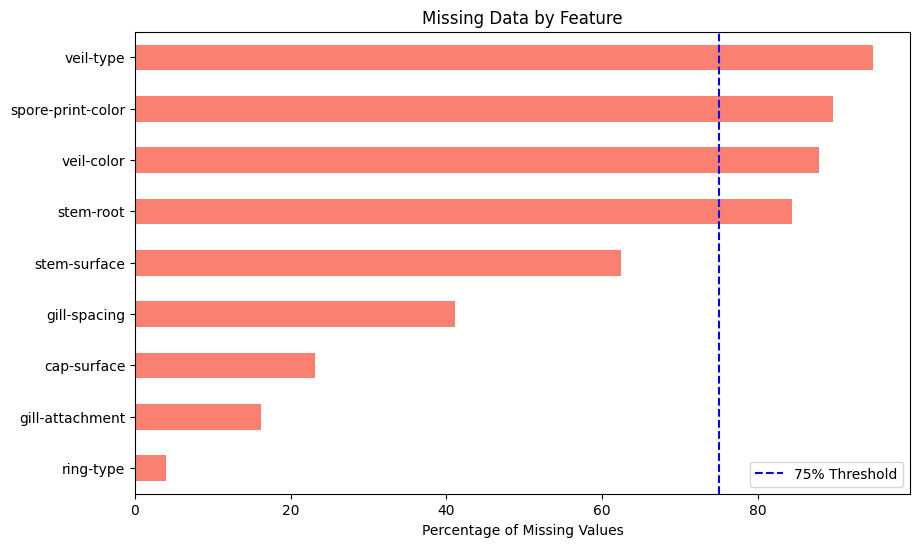

In [9]:
#Given the presence of missing values, consider visualizing the missingness
# Calculate % missing
missing_percent = (X.isnull().sum() / len(X)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
missing_percent.plot(kind='barh', color='salmon')
plt.xlabel('Percentage of Missing Values')
plt.title('Missing Data by Feature')
plt.gca().invert_yaxis()
#include the threshold line
plt.axvline(x=75, color='blue', linestyle='--', label='75% Threshold')
plt.legend()

plt.show()

Since some features have more than 80% missing data, we will drop them to ensure the quality and reliability of the analysis.

In [10]:
#listing and droping the features with missing data greater than 75%
for feat, percent in missing_percent.items():
    if percent >= 75:
        print(feat)


veil-type
spore-print-color
veil-color
stem-root


In [11]:
X_clean=X.drop(columns=missing_percent[missing_percent>=75].index)
X_clean.shape

(61069, 16)

In [12]:
X_clean.isnull().sum()

,0
cap-diameter,0
cap-shape,0
cap-surface,14120
cap-color,0
does-bruise-or-bleed,0
gill-attachment,9884
gill-spacing,25063
gill-color,0
stem-height,0
stem-width,0


Impute the remaining missing values appropriately using suitable techniques based on the nature of the data, such as mean, median, mode, or unknown

In [13]:
for feat, percent in missing_percent.items():
    if 75>=percent >0:
        print(feat,X_clean[feat].dtype)


stem-surface object
gill-spacing object
cap-surface object
gill-attachment object
ring-type object


In [14]:
#for these categorical columns filling them with unknown
X_clean['stem-surface'].fillna('unknown', inplace=True)
X_clean['gill-spacing'].fillna('unknown', inplace=True)
X_clean['cap-surface'].fillna('unknown', inplace=True)
X_clean['gill-attachment'].fillna('unknown', inplace=True)
X_clean['ring-type'].fillna('unknown', inplace=True)

<ipython-input-14-0b9d0e7f0d6f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_clean['stem-surface'].fillna('unknown', inplace=True)
<ipython-input-14-0b9d0e7f0d6f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

# **Step 5:Checking for Duplicates**
Droping duplicates if any

In [15]:
X_clean.duplicated().sum()

np.int64(146)

In [16]:
# Find the indices of duplicate rows in X_clean
duplicate_indices = X_clean[X_clean.duplicated()].index

# Print the number of duplicate rows found
print(f"Number of duplicate rows found in X_clean: {len(duplicate_indices)}")

# Drop the duplicate rows from X_clean
X_clean = X_clean.drop(duplicate_indices)



Number of duplicate rows found in X_clean: 146


In [17]:
# Drop the corresponding rows from y using the same indices
y = y.drop(duplicate_indices)


In [18]:
print("Duplicate rows and corresponding target values deleted successfully.")

# Verify the shapes after dropping duplicates
print("Shape of X_clean after dropping duplicates:", X_clean.shape)
print("Shape of y after dropping corresponding targets:", y.shape)

# Check for duplicates again to confirm removal
print("Number of duplicate rows remaining in X_clean:", X_clean.duplicated().sum())
print("Number of duplicate rows remaining in y:", y.duplicated().sum())

Duplicate rows and corresponding target values deleted successfully.
Shape of X_clean after dropping duplicates: (60923, 16)
Shape of y after dropping corresponding targets: (60923, 1)
Number of duplicate rows remaining in X_clean: 0
Number of duplicate rows remaining in y: 60921


# **Step 6:Finding and Handling outliers**
Outliers are extreme values that can distort your model, reduce accuracy, and mislead analysis.Hence handling them properly is necessary

In [19]:
num_cols=X_clean.select_dtypes(include='number')
num_cols

,cap-diameter,stem-height,stem-width
0,15.26,16.95,17.09
1,16.60,17.99,18.19
2,14.07,17.80,17.74
3,14.17,15.77,15.98
4,14.64,16.53,17.20
...,...,...,...
61064,1.18,3.93,6.22
61065,1.27,3.18,5.43
61066,1.27,3.86,6.37
61067,1.24,3.56,5.44


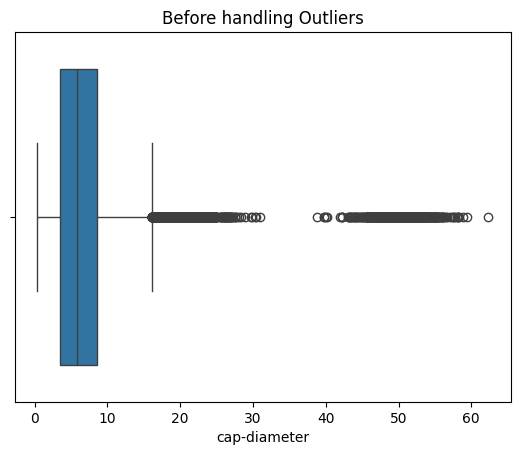

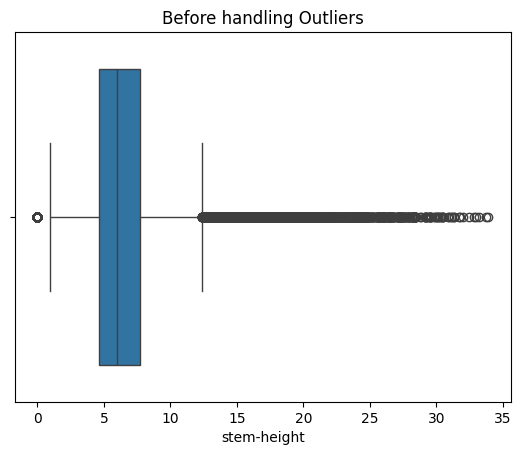

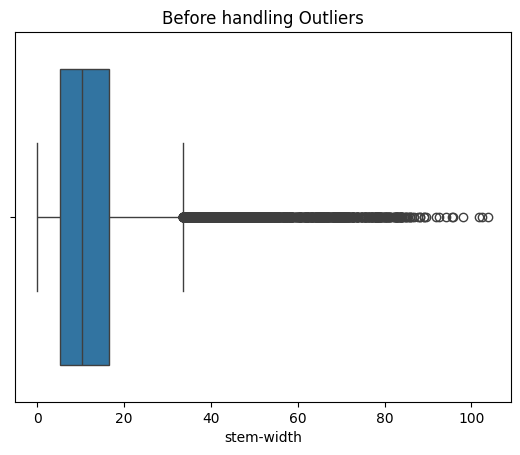

In [20]:
for i in num_cols:
  sns.boxplot(data=X_clean,x=i)
  plt.title('Before handling Outliers')
  plt.show()

In [21]:
def outliers(X_clean):
  for col in X_clean.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = X_clean[col].quantile(0.25)
        Q3 = X_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5 * IQR)

        # Capping
        X_clean[col] = X_clean[col].apply(lambda x: lower if x < lower else upper if x > upper else x)

  return X_clean

In [22]:
X_clean=outliers(X_clean)

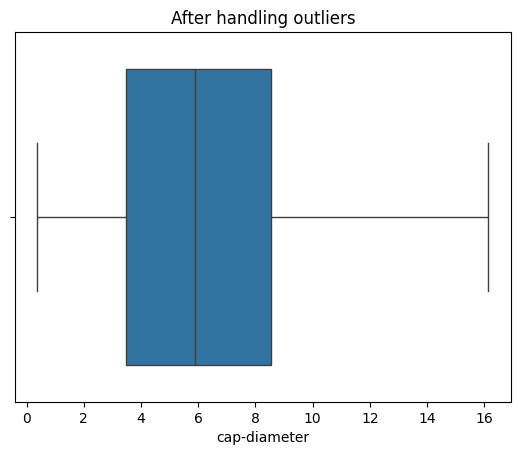

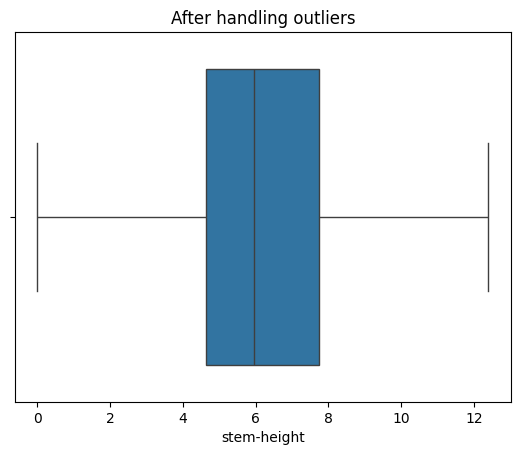

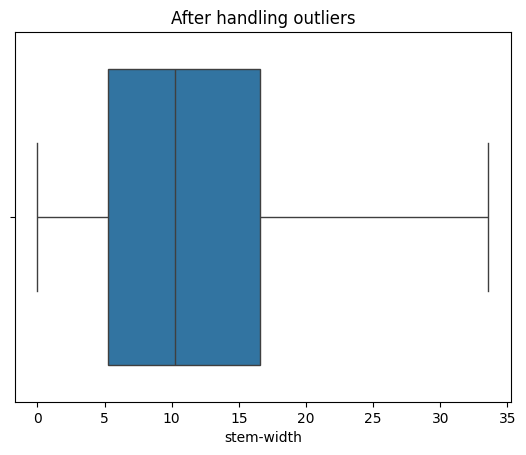

In [23]:
for i in num_cols:
  sns.boxplot(data=X_clean,x=i)
  plt.title('After handling outliers')
  plt.show()

In [24]:
X_clean.shape

(60923, 16)

# **Step 7: Encoding catagorical data**
Converting categorical data (text or labels) into a numeric format that machine learning models can understand.

In [25]:
print(X_clean.dtypes)
X_encoded = pd.get_dummies(X_clean, drop_first=True)
print(X_encoded.dtypes)
print(X_encoded.head())

cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-surface             object
stem-color               object
has-ring                 object
ring-type                object
habitat                  object
season                   object
dtype: object
cap-diameter    float64
stem-height     float64
stem-width      float64
cap-shape_c        bool
cap-shape_f        bool
                 ...   
habitat_u          bool
habitat_w          bool
season_s           bool
season_u           bool
season_w           bool
Length: 92, dtype: object
   cap-diameter  stem-height  stem-width  cap-shape_c  cap-shape_f  \
0         15.26         12.4       17.09        False        False   
1         16.14         12.4       18.19    

In [26]:
LE=LabelEncoder()
y['class']= LE.fit_transform(y['class'])
y.head()
y_encoded=y

# **Step 8: Skewness**
To find the skewness of the dataset

In [27]:
from sklearn.preprocessing import PowerTransformer

# Initialize the transformer (Yeo-Johnson works with zero/negative values)
pt = PowerTransformer(method='yeo-johnson')


In [28]:
numerical_col = X_encoded.select_dtypes(include= 'number').columns
print(X_encoded[numerical_col].skew())

cap-diameter    0.79101
stem-height     0.54777
stem-width      0.86675
dtype: float64


In [29]:
X_encoded[numerical_col] = pt.fit_transform(X_encoded[numerical_col])
print(X_encoded[numerical_col].skew())

cap-diameter   -0.027865
stem-height     0.067591
stem-width     -0.054495
dtype: float64


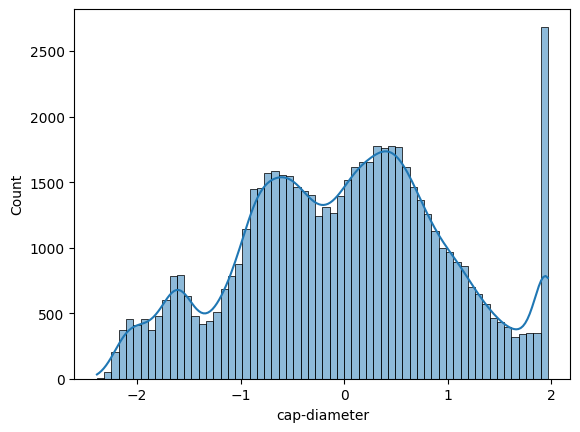

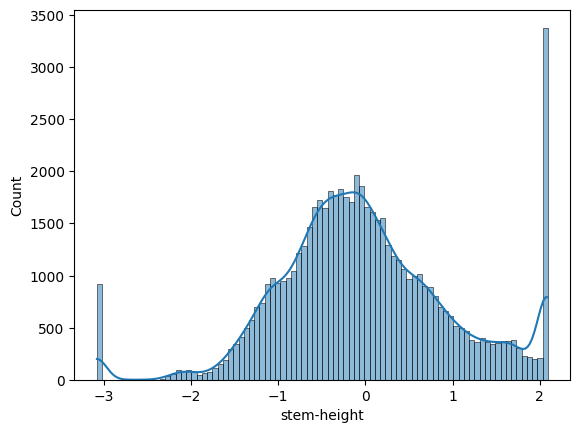

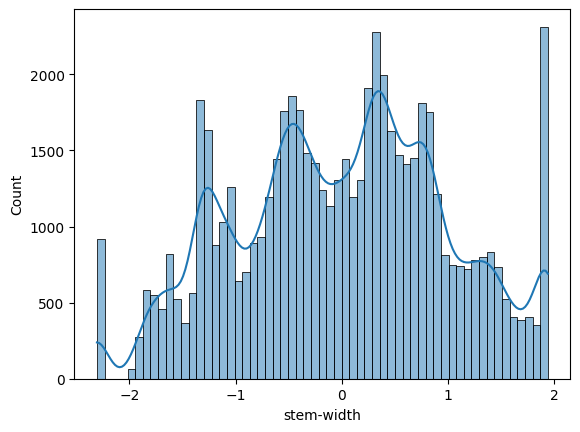

In [30]:
for i in numerical_col:
  sns.histplot(data=X_encoded,x=i,kde=True)
  plt.show()

# **Step 9: Correlation and Heatmap**

Finding correlation and plotting them into a heatmap

In [31]:
cor= X_encoded.corr()
cor

,cap-diameter,stem-height,stem-width,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,cap-surface_e,...,habitat_g,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_s,season_u,season_w
cap-diameter,1.000000,0.522562,0.846846,-0.127536,0.062686,-0.005347,0.094309,0.100837,0.033859,0.195549,...,-0.229171,-0.088991,-0.040522,-0.058789,-0.063604,0.040028,0.014915,-0.063786,-0.033738,0.069982
stem-height,0.522562,1.000000,0.512512,0.004347,-0.016018,-0.340133,0.210261,-0.104998,0.129993,0.108337,...,-0.049103,-0.046729,-0.009080,-0.001930,-0.054631,0.089491,-0.051642,-0.050049,0.003156,-0.034120
stem-width,0.846846,0.512512,1.000000,-0.096462,0.014906,0.028311,0.100310,0.095896,0.058560,0.192730,...,-0.237796,-0.110732,-0.019691,-0.055844,0.022150,0.013259,0.024029,-0.038288,-0.043128,0.042701
cap-shape_c,-0.127536,0.004347,-0.096462,1.000000,-0.093068,-0.042042,-0.036983,-0.063969,-0.155979,0.046478,...,0.031931,-0.004666,0.060713,-0.039317,0.103641,-0.007621,-0.013377,0.075351,0.022985,-0.053716
cap-shape_f,0.062686,-0.016018,0.014906,-0.093068,1.000000,-0.127425,-0.112092,-0.193881,-0.472755,-0.019173,...,-0.039960,-0.008281,0.078521,0.037757,0.006614,0.028023,0.052902,-0.057158,-0.031866,0.054676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
habitat_u,0.040028,0.089491,0.013259,-0.007621,0.028023,-0.010434,0.101244,-0.015875,-0.038710,-0.009152,...,-0.016839,-0.008014,-0.010185,-0.009757,-0.003353,1.000000,-0.003320,0.040258,-0.014163,0.035253
habitat_w,0.014915,-0.051642,0.024029,-0.013377,0.052902,-0.018316,-0.016112,-0.027868,0.007817,-0.016067,...,-0.029559,-0.014068,-0.017880,-0.017129,-0.005886,-0.003320,1.000000,-0.016436,0.021711,-0.023402
season_s,-0.063786,-0.050049,-0.038288,0.075351,-0.057158,0.175496,0.084450,-0.078596,-0.084671,-0.022355,...,-0.006844,-0.019088,0.009935,0.041316,-0.016600,0.040258,-0.016436,1.000000,-0.166796,-0.065999
season_u,-0.033738,0.003156,-0.043128,0.022985,-0.031866,0.000790,-0.013997,0.031159,-0.010528,-0.066983,...,0.048318,0.013220,-0.040802,0.006319,0.013703,-0.014163,0.021711,-0.166796,1.000000,-0.237477


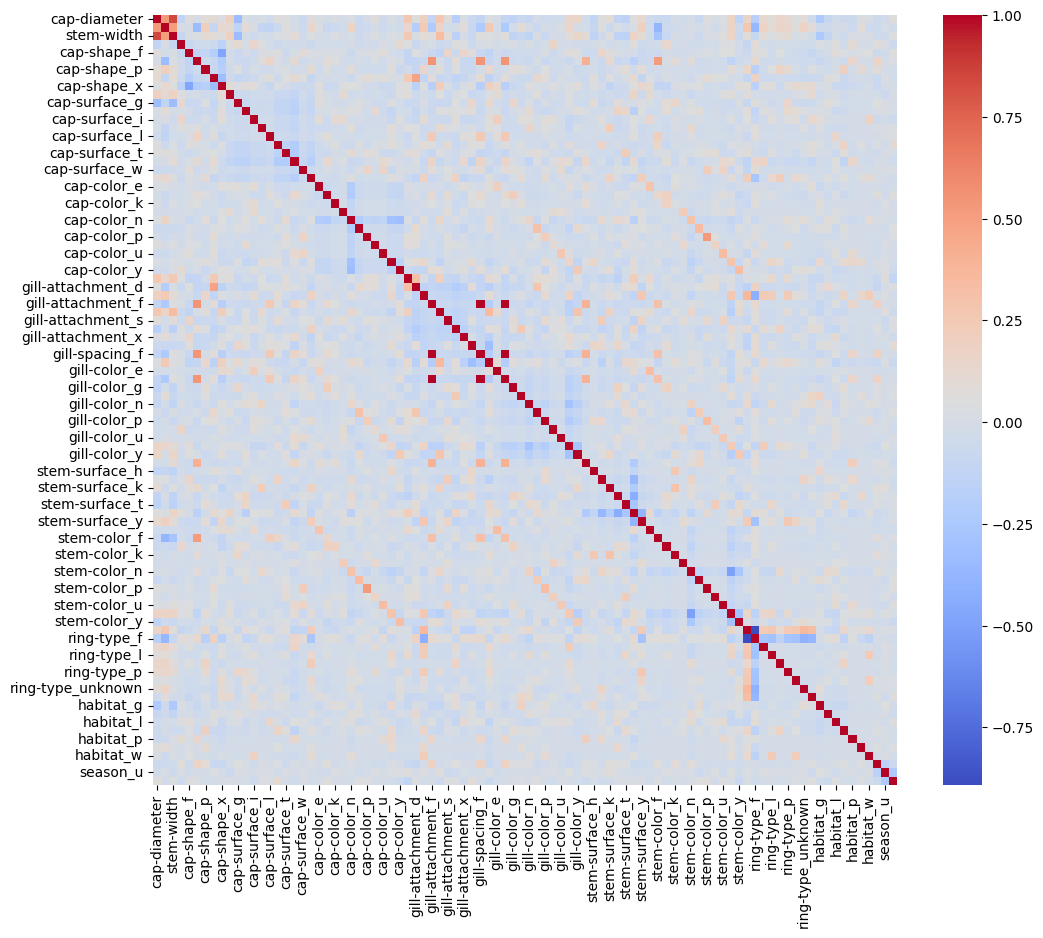

In [32]:
plt.figure(figsize=(12, 10))
sns.heatmap(cor, annot=False, cmap='coolwarm', fmt=".2f")# since the heatmap is big, annotation makes it complex
plt.show()

# **Step 10: Feature selection**
To find which columns (features) are most useful for predicting the target.

In [33]:
#introducing random forest classifier for feature selection
model = RandomForestClassifier(random_state=42)
model.fit(X_encoded, y_encoded)

#finding the importance of each feature
importances = pd.Series(model.feature_importances_, index=X_encoded.columns)

#sorting and printing the features
importances = importances.sort_values(ascending=False)
print(importances)

#Higher score = more important feature.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


stem-width        0.092310
cap-diameter      0.063262
stem-height       0.060597
stem-color_w      0.035482
gill-spacing_d    0.030738
                    ...   
stem-color_k      0.001180
habitat_w         0.001179
stem-color_l      0.000670
habitat_p         0.000380
habitat_u         0.000273
Length: 92, dtype: float64


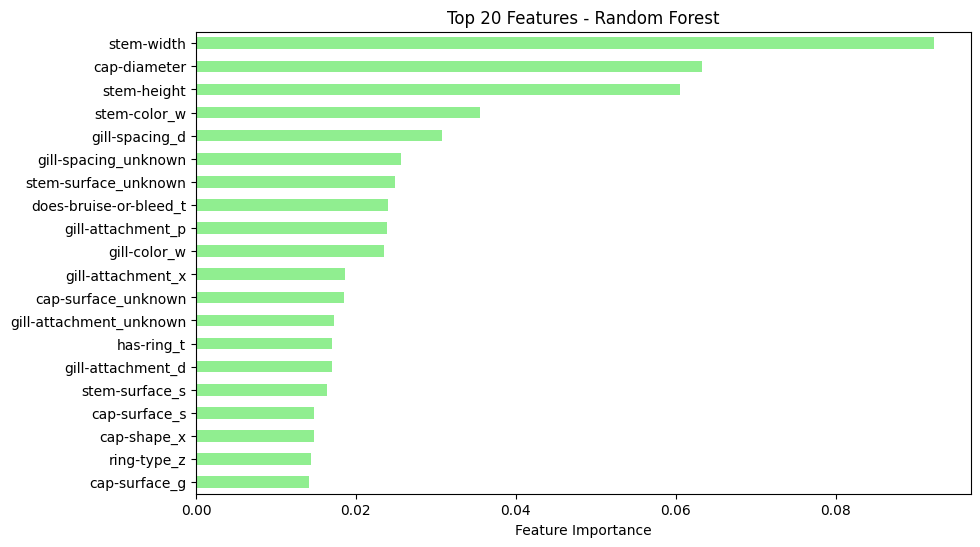

In [34]:
top_features = importances.head(20)

plt.figure(figsize=(10,6))
top_features.plot( kind='barh',color='lightgreen')
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title('Top 20 Features - Random Forest')
plt.show()

In [35]:
# making the dataframe with the top 15 features
selected_features = importances.head(15).index.tolist()
print(selected_features)
X_selected = X_encoded[selected_features]
#check
print(X_selected.shape)
#print(X_selected.head)

['stem-width', 'cap-diameter', 'stem-height', 'stem-color_w', 'gill-spacing_d', 'gill-spacing_unknown', 'stem-surface_unknown', 'does-bruise-or-bleed_t', 'gill-attachment_p', 'gill-color_w', 'gill-attachment_x', 'cap-surface_unknown', 'gill-attachment_unknown', 'has-ring_t', 'gill-attachment_d']
(60923, 15)


# **Step 11: Feature scaling**
To make all features have a similar range of values.

In [36]:
# Initializing scaler
scaler = StandardScaler()

num_cols = X_selected.select_dtypes(include= 'number').columns


# Fit and transform only on numerical columns
X_scaled = scaler.fit_transform(X_selected)

# **Step 12: Splitting the dataset**
Splitting the dataset for training and testing

In [37]:
X_train,X_test,y_train,y_test= train_test_split(X_scaled,y_encoded,test_size=0.2,random_state=42, stratify=y)
# stratify= y ensures the data is split in a balanced way

# **Step 13: Model selection**
Selecting the best model based on accuracy

In [38]:
models= {
    "logistic regression":LogisticRegression(),
    "random forest classifier":RandomForestClassifier(),
    "gradient boosting classifier":GradientBoostingClassifier(),
    "decision tree classifier":DecisionTreeClassifier(),
    "SVM":SVC()
}

In [39]:
results ={}

for model_name,model in models.items():
  model.fit(X_train,y_train)

  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test,y_pred)

  cm=confusion_matrix(y_test,y_pred)

  cr=classification_report(y_test,y_pred)

  results[model_name] = {
      "Accuracy":accuracy,
      "confusion matrix":cm,
      "classification report":cr
  }

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for

In [40]:
# Sorting models by accuracy in descending order
sorted_results = sorted(results.items(), key=lambda x: x[1]['Accuracy'], reverse=True)

# Assigning the best model
best_model_name = sorted_results[0][0]
best_model_metrics = sorted_results[0][1]

# Print sorted results
for model_name, matrix in sorted_results:
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {matrix['Accuracy']:.4f}")
    print(f"\nConfusion Matrix:\n{matrix['confusion matrix']}")
    print(f"\nClassification Report:\n{matrix['classification report']}")

print(f"\n Best Model: {best_model_name} with Accuracy: {best_model_metrics['Accuracy']:.4f}")



random forest classifier Results:
Accuracy: 0.9949

Confusion Matrix:
[[5407   29]
 [  33 6716]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5436
           1       1.00      1.00      1.00      6749

    accuracy                           0.99     12185
   macro avg       0.99      0.99      0.99     12185
weighted avg       0.99      0.99      0.99     12185


decision tree classifier Results:
Accuracy: 0.9908

Confusion Matrix:
[[5383   53]
 [  59 6690]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5436
           1       0.99      0.99      0.99      6749

    accuracy                           0.99     12185
   macro avg       0.99      0.99      0.99     12185
weighted avg       0.99      0.99      0.99     12185


SVM Results:
Accuracy: 0.9826

Confusion Matrix:
[[5336  100]
 [ 112 6637]]

Classification Report:
 

# **Step 14: Pipeline creation**
Sequential series of data processing and modeling steps that are bundled together to automate and streamline the workflow

In [41]:
pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler()),
    ('model',RandomForestClassifier())
])

In [42]:
pipeline.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', RandomForestClassifier())])

In [43]:
ypred=pipeline.predict(X_test)

In [44]:
joblib.dump(pipeline,'sec_mushroom.joblib')

['sec_mushroom.joblib']

In [45]:
joblib.dump(pipeline,'sec_mushroom.joblib')

['sec_mushroom.joblib']

# **Step 15: Hyperparameter tuning**
process of searching for the best combination of hyperparameters (settings external to the model) that leads to the best performance on a validation set.



In [46]:

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Initialize the classifier
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid,
                              cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit on training data
grid_search_rf.fit(X_train, y_train)

# Print best parameters and accuracy
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_rf.best_score_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.9950962288152981


# **Step 16: Model Application**
Applying the model in existing row to check whether the prediction is right or not.

In [47]:
# Apply same get_dummies encoding to new data
new_data = pd.get_dummies(X_clean.iloc[[18]])  # One-hot encode the single row

# Reindex to match training columns, filling missing values with 0
new_data = new_data.reindex(columns=X_selected.columns, fill_value=0)

# Scale the new data using the same StandardScaler
new_data_scaled = scaler.transform(new_data)

# Predict with trained model
predicted_result = model.predict(new_data_scaled)


decoded_result = LE.inverse_transform(predicted_result)
actual_class_encoded = y.iloc[4]
actual_class_decoded = LE.inverse_transform([actual_class_encoded])

print("Predicted class (decoded):", decoded_result[0])
print("Actual class (true)  :", actual_class_decoded[0])

Predicted class (decoded): p
Actual class (true)  : p


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
